In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv("/Users/pranjalideshmukh/Downloads/customer_booking (1).csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

# Data Preprocessing 

In [4]:
df.shape

(50000, 14)

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [8]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [9]:
df["sales_channel"].unique()

array(['Internet', 'Mobile'], dtype=object)

In [10]:
#using pd_getdummies as there are 3 unique categories
trip=pd.get_dummies(df['trip_type'],drop_first=True)
sales=pd.get_dummies(df['sales_channel'],drop_first=True)

In [11]:
df.drop(['trip_type','sales_channel'],inplace=True,axis=1)
df=pd.concat([df,trip,sales],axis=1)
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,OneWay,RoundTrip,Mobile
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,1,0
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,1,0
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,1,0
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,1,0
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0,1,0


In [12]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
numerical_features

['num_passengers',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'flight_day',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration',
 'booking_complete',
 'OneWay',
 'RoundTrip',
 'Mobile']

In [13]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
categorical_features

['route', 'booking_origin']

Using Label encoding for rest of categorical variables

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for feature in categorical_features:
    df[feature]=le.fit_transform(df[feature])

In [15]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,OneWay,RoundTrip,Mobile
0,2,262,19,7,6,0,61,1,0,0,5.52,0,0,1,0
1,1,112,20,3,6,0,61,0,0,0,5.52,0,0,1,0
2,2,243,22,17,3,0,36,1,1,0,5.52,0,0,1,0
3,1,96,31,4,6,0,61,0,0,1,5.52,0,0,1,0
4,2,68,22,15,3,0,36,1,0,1,5.52,0,0,1,0


In [16]:
not_booked=df[df['booking_complete']==0]
booked=df[df['booking_complete']==1]
print("count of people who didn't book {}, count of people who did book {}".format(not_booked.shape,booked.shape))

count of people who didn't book (42522, 15), count of people who did book (7478, 15)


<AxesSubplot:xlabel='booking_complete', ylabel='count'>

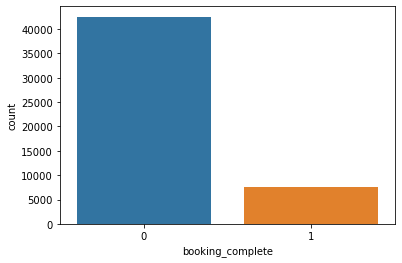

In [17]:
sns.countplot(x='booking_complete',data=df)

As we can notice the dataset is imbalanced. As people who didn't book are 42522 and who did are 7478. This causes confusion in model and there are more false positives or negatives as ML model tends to choose or be bias towards the negative/not booking. So performing oversampling.

# Oversampling

In [18]:
X=df.drop(['booking_complete'],axis=1)
Y=df['booking_complete']

In [19]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [20]:
counter=Counter(Y)
print('Before oversampling y {}'.format(counter))

Before oversampling y Counter({0: 42522, 1: 7478})


In [21]:
smt=SMOTE()
X_sm,Y_sm=smt.fit_resample(X,Y)

In [22]:
counter2=Counter(Y_sm)
print('After oversampling y {}'.format(counter2))

After oversampling y Counter({0: 42522, 1: 42522})


# Model Training

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,Y_sm,test_size=0.2,random_state=42)

In [28]:
def model_trying(model):
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    report = classification_report(y_test, pred)
    print("Accuracy :",acc)
    print("Confusion matrix:",cm)
    print("Classification report",report)

In [29]:
model_trying(LogisticRegression())

Accuracy : 0.6426009759539068
Confusion matrix: [[5506 2938]
 [3141 5424]]
Classification report               precision    recall  f1-score   support

           0       0.64      0.65      0.64      8444
           1       0.65      0.63      0.64      8565

    accuracy                           0.64     17009
   macro avg       0.64      0.64      0.64     17009
weighted avg       0.64      0.64      0.64     17009



/Users/pranjalideshmukh/Downloads/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
model_trying(RandomForestClassifier(n_estimators=100, random_state=42))

Accuracy : 0.8787112705038509
Confusion matrix: [[7331 1113]
 [ 950 7615]]
Classification report               precision    recall  f1-score   support

           0       0.89      0.87      0.88      8444
           1       0.87      0.89      0.88      8565

    accuracy                           0.88     17009
   macro avg       0.88      0.88      0.88     17009
weighted avg       0.88      0.88      0.88     17009



In [33]:
model_trying(XGBClassifier())

Accuracy : 0.8398494914457052
Confusion matrix: [[7030 1414]
 [1310 7255]]
Classification report               precision    recall  f1-score   support

           0       0.84      0.83      0.84      8444
           1       0.84      0.85      0.84      8565

    accuracy                           0.84     17009
   macro avg       0.84      0.84      0.84     17009
weighted avg       0.84      0.84      0.84     17009



Based on all of above models, selecting Random Forest Model

In [37]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

In [38]:
from sklearn.model_selection import cross_val_score


# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-validation scores: [0.87432939 0.86800911 0.86624531 0.87646065 0.8742559 ]
Mean Accuracy: 0.8718600720217534
Standard Deviation: 0.003983921827537873


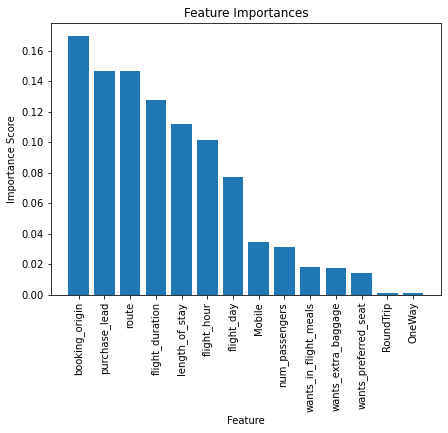

In [48]:
importances = model.feature_importances_
feature_names = X_train.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(7,5))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()
